#Introduction

Today, you will be implementing models for linear regression on a dataset that we will provide. Every year, the World Happiness Report ranks countries in terms of their happiness, and gives scores for each country on key metrics that we will be analyzing today. We will be analyzing the 2019 World Happiness Report, found [here](https://worldhappiness.report/ed/2019/). The data that we will be working on was taken from [Kaggle](https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv). Download the .csv file contained at this link, and upload it to your Colab files.

The metrics that the report scores are as follows:

*   Total Score
*   GDP Per Capita
*   Social Support
*   Healthy Life Expectancy
*   Freedom to Make Life Choices
*   Generosity
*   Perceptions of Corruption

We will be investigating relationships between these models, and seeing how pertinent each model was in the total score. The scores for each metric were added up for each country to generate a total score that was used to generate the final rank.


#Loading the Dataset

To start, in the following code block, read the happiness_data.csv file into a pandas dataframe using the ```read_csv``` method.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#TODO: copy happiness_data.csv into your drive, then read into pandas dataframe

What we have just done is insert this data into a Pandas DataFrame. 
Print out the attributes (column headers) for the data.  If you have forgotten how to do this, please review the previous units and assignments on Pandas.

In [ ]:
print("Possible metrics to investigate:")
#TODO:  print out all the attributes in the data file

#Metric Selection
Let's determine what metrics we want to look into. To start, let's see the relationship between GDP per capita vs. social support. The variables ```x_metric``` and ```y_metric``` will store the column names that we want to look into. In order to make this work, any metric that we list here will have to be spelled exactly like the previous code block's output.

The variables ```x_arr``` and ```y_arr``` are NumPy arrays of the data in each column. We will now be able to use our new NumPy skills to do some data analysis! Run the code block to get all variables stored in our data.   Hint:  reference the NumPy ```to_numpy``` function. 


In [ ]:
# TODO: Assign the attribute labels
x_metric = ...
y_metric = ...

#TODO: Assign the data to a numpy array
x_arr = ...
y_arr = ...

# Plotting
Below is code that we will be able to use to plot the data that we want to investigate. At first, you will notice that there is a large block of code that is commented out. This is because we will want to implement methods that will tell us more about what is going on in terms of the relationships between these variables. At first, however, run this block of code to see a scatterplot of the two metrics plotted against each other. After finishing the methods in the code blocks below, uncomment the code and you will be able to see a line of best fit plotted along with the data, as well as a text box with the statistics you came up with. 

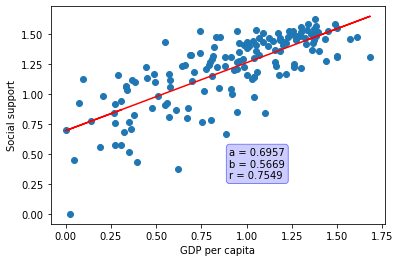

In [ ]:
# TODO: uncomment section when methods get_ab and get_r are complete
#       An example of the output is shown below.
'''
ab_arr = get_ab(x_arr, y_arr)
r = get_r(x_arr, y_arr)
a = ab_arr[0]
b = ab_arr[1]
plt.plot(data[x_metric], a + data[x_metric] * b, 'r')
plt.text(np.average(x_arr), a + np.min(x_arr) * b - .4,
             "a = " + "{:.4f}".format(a) + "\nb = " + "{:.4f}".format(b) + "\nr = " + "{:.4f}".format(r),
             bbox = dict(boxstyle="round",
                ec=(0.5, 0.5, 1.),
                fc=(0.8, 0.8, 1.),
             )
        )
'''

plt.scatter(data[x_metric], data[y_metric])
plt.xlabel(x_metric)
plt.ylabel(y_metric)

plt.show()

# Linear Regression Implementation

###Introduction & Equation
Linear regression is the process of providing a linear equation that serves as a "line of best fit" to the data at hand. This is used as a predictive model, and we will go into the depths of the inner workings of this equation in a future course. The line of best fit for the plot above should be something similar to a line from the 0.6 tick to the upper right-hand corner. After finishing these sections, running the plots above will plot the line of best fit as well.  We will be studying linear regression in detail in a future course so don't worry if you don't fully understand the description below.  

To start, let's implement a basic model of linear regression using NumPy arrays. The formula to implement linear regression is as follows:

$
\begin{equation}
\begin{matrix}
a \\
b
\end{matrix}
=(X^T*X)^{-1}*X^T*y
\end{equation}
$

Let's break this equation down a little bit. To start, $X$ and $y$ represent our data. The symbol $X^T$ represents the transpose of $X$, and the $^{-1}$ denotes taking the inverse. $a$ and $b$ represent the y-intercept and slope of the resulting line of best fit, so the line would be $y = a + bx$. 




###Transforming X
Unfortunately, $X$ will have to be slightly modified in order to fit in with the data. You will notice that we want our output to be a ```2 x 1``` matrix. If both $X$ and $y$ are ```n x 1``` matrices/vectors (```n``` is the number of examples in our dataset), our output will be of size ```((1 x n) * (n x 1)) * (1 x n) * (n x 1) ```, which in the end turns out to be a ```1 x 1``` matrix  (Try to work this out on your own; as a hint, the inverse does not change the shape of a matrix). This is clearly not what we want.

During the process of linear regression, **we need to add a column of ones to the $X$ matrix, so that it turns into an ```n x 2``` matrix.** The details of why we need to do this is not within the scope of this specific project, but we will learn more about this later.

At first, $\begin{equation} X = 
\begin{matrix} 
x_0 \\
x_1 \\
x_2 \\
... \\
x_n 
\end{matrix} 
\end{equation}$. We will need to transform it into $\begin{equation} X = 
\begin{matrix} 
1 & x_0 \\
1 & x_1 \\
1 & x_2 \\
1 & ... \\
1 & x_n 
\end{matrix} 
\end{equation}$

In order to do this, you need to create a vector of ones to concatenate to X. To combine the two arrays, try using the methods ```np.concatenate``` or ```np.stack```. To find out more about these methods, look at the NumPy docs, or find examples of their use on Stack Overflow. You may need to use the ```.reshape``` method that was discussed in the NumPy lecture as well. Attempt step 1 of the method below now. Print out the final array and shape of the resulting matrix, and make sure that its final shape is of size ```n x 2```.


###Performing the Equation

After finishing step 1, try to implement the new equation with your new $X$ variable. Remember to use the ```.transpose()``` and ```np.linalg.inv()``` methods to transform X in the correct ways. Your output should be a matrix of size 2. Make sure that all doctest test cases pass before moving onto the next section.  Your output should look like the example shown in the console output.


In [ ]:
import doctest
import numpy as np

def get_ab(x, y):
  """
  >>> get_ab(np.array([0, 1, 2]), np.array([2, 4, 6]))
  array([2., 2.])
  >>> get_ab(np.array([1, 2, 5]), np.array([1, 1, 2]))
  array([0.61538462, 0.26923077])
  """

  # Params:
  #   x - NumPy array with one axis representing data from variable x_metric
  #   y - NumPy array with one axis representing data from variable y_metric
  # Return:
  #   NumPy array of size 2 with element 0 representing a and element 1 
  #   representing b in the line of best fit a + bx = y using the equation above

  # TODO: Step 1 - transform x from a vector of shape n x 1 into a matrix of 
  #       shape n x 2.


  # TODO: Step 2 - perform the equation on new x and y, return the result

  
  

doctest.run_docstring_examples(get_ab, globals(), verbose=True) 

Finding tests in NoName
Trying:
    get_ab(np.array([0, 1, 2]), np.array([2, 4, 6]))
Expecting:
    array([2., 2.])
ok
Trying:
    get_ab(np.array([1, 2, 5]), np.array([1, 1, 2]))
Expecting:
    array([0.61538462, 0.26923077])
ok


# Correlation Coefficient Implementation

### Introduction & Equation
Again, we will be covering this in much more detail in a future course so don't worry if you don't fully understand the math here.  The correlation coefficient is a measure of how well two variables relate to each other. This is on a scale from -1 to 1. If a variable increases while the other decreases, the correlation coefficient will be negative, and if they both increase and decrease with each other, the correlation coefficient will be positive. Additionally, the strength of their correlation is reflected in how far away their values are from 0. For example, a correlation coefficient of -1 to -.7 or .7 to 1 is a relatively strong relationship between variables, and a correlation coefficient from -.3 to .3 signifies a weak relationship or even a non-relationship between two variables.

The equation to find the correlation coefficient is as follows:

##$
\begin{equation}
r=
\frac
{n(\sum{xy}) - (\sum{x})(\sum{y})}
{\sqrt{[n(\sum{x^2})-(\sum{x})^2][n(\sum{y^2})-(\sum{y})^2]}}
\end{equation}
$

This equation looks intimidating, but when breaking it down, there isn't too much to worry about. Firstly, $n$ is a variable that represents the number of examples that we have. $\sum$ is a symbol that represents the sum of a vector. Whatever is in the parentheses associated with the $\sum$ should be added together. Finally, $x$ and $y$ are our data vectors. We don't have to worry about adding a column of ones to $x$ this time. 

### Implementation
Your job is to fill in the ```get_r``` method. The parameters ```x``` and ```y``` are two NumPy array objects from the columns specified by the metric selection section. To implement the function, you may want to break the function down into four seperate parts of the equation that interact with each other:


*   $a = n(\sum{xy})$
*   $b = (\sum{x})(\sum{y})$
*   $c = [n(\sum{x^2})-(\sum{x})^2]$
*   $d = [n(\sum{y^2})-(\sum{y})^2]$




Once we break this down into four sections, the overall equation becomes the following:
##$\frac
{a - b}
{\sqrt{cd}}$

In order to do compute all four variables, you will need to use the ```np.sum()``` method. Look this method up in the NumPy docs or search Stack Overflow to make sure that you know how to use it correctly. Additionally, you will need to come up with a value for $n$. Ask yourself how can we find the number of examples given the information that we have (hint: what variables come with the NumPy array objects?). Finally, make sure that you are summing the correct vectors for each example. For example, the difference between $(\sum{x^2})$ and $(\sum{x})^2$ is when you square. In $(\sum{x^2})$, square every element first and then sum the results, and in $(\sum{x})^2$, sum every element first and then square the result. Make sure that every doctest test case passes before you move on.  Your output should look like the example in the console output.



In [ ]:
import doctest
import numpy as np

def get_r(x, y):
  '''
  >>> print(get_r(np.array([0, 1, 2]), np.array([2, 4, 6])))
  1.0
  >>> print(str(int(get_r(np.array([1, 2, 5]), np.array([1, 1, 2])) * 1000000)))
  970725
  >>> print(str(int(get_r(np.array([4, 2, 1, 6, 8, 9]), np.array([3, 3, 7, 8, 2, 2])) * 1000000)))
  -422934
  '''

  # TODO: fill in method
  # Params:
  #   x - NumPy array with one axis representing data from variable x_metric
  #   y - NumPy array with one axis representing data from variable y_metric
  # Return:
  #   float representing the Pearson Correlation Coefficient of x and y

doctest.run_docstring_examples(get_r, globals(), verbose=True) 

Finding tests in NoName
Trying:
    print(get_r(np.array([0, 1, 2]), np.array([2, 4, 6])))
Expecting:
    1.0
ok
Trying:
    print(str(int(get_r(np.array([1, 2, 5]), np.array([1, 1, 2])) * 1000000)))
Expecting:
    970725
ok
Trying:
    print(str(int(get_r(np.array([4, 2, 1, 6, 8, 9]), np.array([3, 3, 7, 8, 2, 2])) * 1000000)))
Expecting:
    -422934
ok


#Your turn!!

Hopefully, you have now gotten some practical experience in working with NumPy, Pandas, and Matplotlib and applying your new Linear Algebra knowledge. Now, you can scroll back to the Metric Selection section and choose to see how different metrics correlate with each other. Just change the variables ```x_metric``` and ```y_metric``` variables, run the code block, then run the Plotting code block with the commented section uncommented. You will see the line of best fit applied over your scatterplot, as well as a text box with the statistics that you came up with.  

Investigate 2 other relationships between 2 variables by changing the variables as described above and comment on your results in the following assignment.  Note, you will be asked to upload code and screenshots for your work in the assignment so save your work!

In [ ]:
#TODO - Your Turn 1
#       Create the appropriate setup and variable assignments 
#       to exame the relationship between 2 variables (different from the previous steps)
#       Capture the plots as in the previous steps and note your observations.

#TODO - Your Turn 2
#       Create the appropriate setup and variable assignments 
#       to exame the relationship between 2 variables (different from the previous steps)
#       Capture the plots as in the previous steps and note your observations.